In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import numpy as np

# Import the data

In [3]:
raw_data=pd.read_csv("bank-additional-full.csv",sep=";")

In [4]:
raw_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
raw_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
#copy the raw data into a new data frame for analysis
data=raw_data.copy()

In [7]:
#check for null values in the data
data.count().isnull()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [8]:
#there are no missing values, hence we start analysing each feature.
#lets begin with age
data["age"].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [9]:
#data["age"].unique()
#values with frequency is given by
data["age"].value_counts()

31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64

Text(0.5, 1.0, 'Age Count')

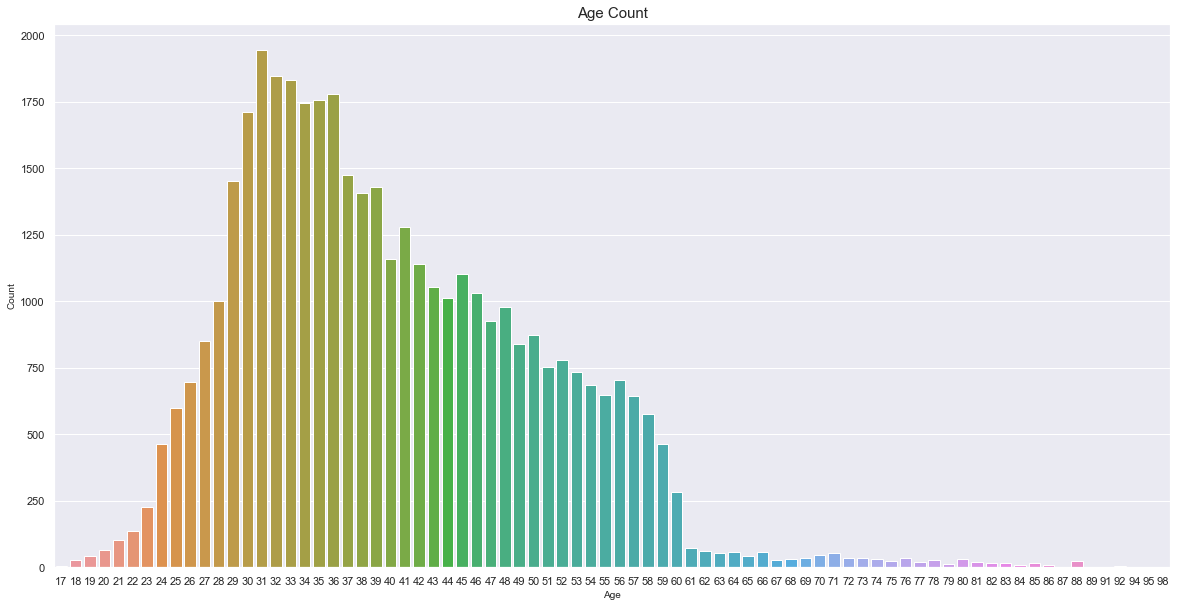

In [10]:
#lets plot a graph to check how the age is distributed
plt.figure(figsize=(20,10))
ax = sns.countplot(data["age"])
ax.set_xlabel("Age",fontsize=10)
ax.set_ylabel("Count",fontsize=10)
ax.set_title("Age Count",fontsize=15)

Text(0.5, 1.0, 'Age Count')

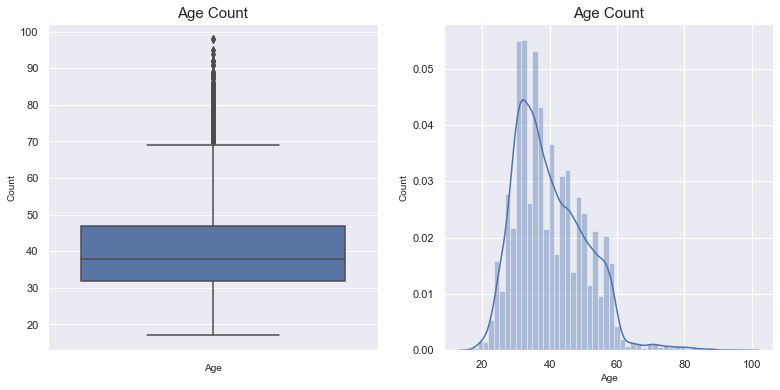

In [11]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,6))
ax1 = sns.boxplot(data["age"],ax=ax1,orient="v")
ax1.set_xlabel("Age",fontsize=10)
ax1.set_ylabel("Count",fontsize=10)
ax1.set_title("Age Count",fontsize=15)

ax2=sns.distplot(data["age"],ax=ax2)
ax2.set_xlabel("Age",fontsize=10)
ax2.set_ylabel("Count",fontsize=10)
ax2.set_title("Age Count",fontsize=15)

Text(0.5, 1.0, 'Age:DistPlot')

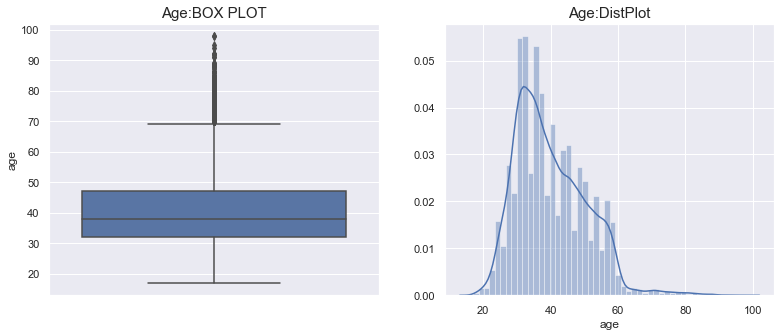

In [12]:
#Another way where you can plot the graph 
fig, axs = plt.subplots(1,2,figsize=(13,5))
sns.boxplot(x=data['age'],ax=axs[0],orient="v").set_title("Age:BOX PLOT",fontsize=15)
sns.distplot(data['age'],ax=axs[1]).set_title("Age:DistPlot",fontsize=15)

### From the Graphs, we can see that there are outliers and hence, we can calculate the IQR range and see what percentage of the data are outliers

In [13]:
q1=data["age"].quantile(0.25)

In [14]:
q3=data["age"].quantile(0.75)

In [15]:
IQR=q3-q1
upper_q=q3+1.5*IQR

In [16]:
print("Ages above" ,upper_q, "are outliers")

Ages above 69.5 are outliers


In [17]:
#print the number of outlieres
no_outliers=data[data['age'] > 69.6]['age'].count()

In [18]:
#print outlier percentage
print(no_outliers/len(data["age"]) *100)

1.1386811692726035


In [19]:
#calculate statistics co-effecient
print("Mean=",data["age"].mean(),
    "\nStandard Deviation = ",data["age"].std(),
    "\n CV = ",(data["age"].std()/data["age"]).mean()*100) #co-effecien of variaion = std/mean

Mean= 40.02406040594348 
Standard Deviation =  10.421249980934235 
 CV =  27.767593377413114


### From the above results we can see that the data is pretty scattered, CV of >10% is highly dispersed.Hence we can try and fit the  data with and without the outlier and check the performance

In [20]:
#lets go to next feature
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [21]:
data["job"].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

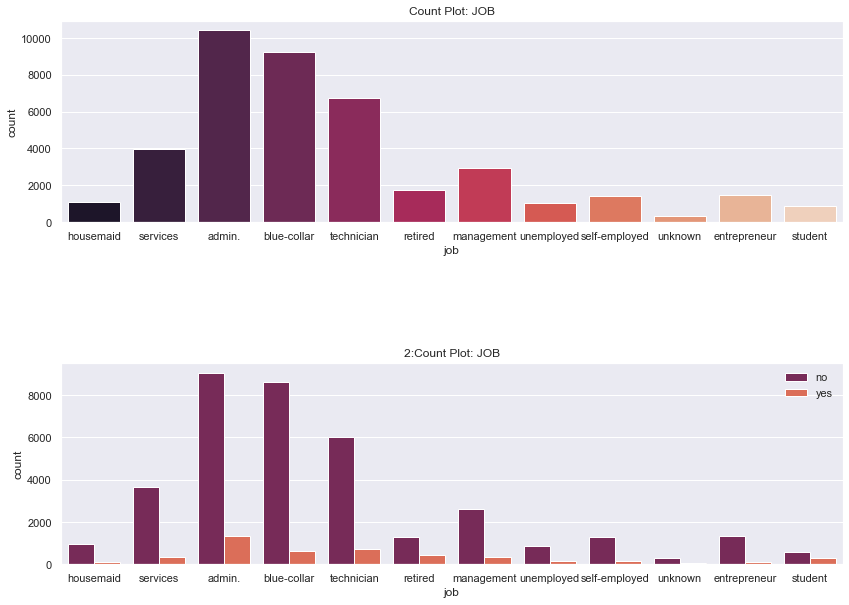

In [22]:
fig,axs = plt.subplots(2,1,figsize=(14,10))
sns.countplot(data["job"],palette="rocket",ax=axs[0]).set_title("Count Plot: JOB")
sns.countplot(data["job"],hue="y",data=data,palette="rocket",ax=axs[1]).set_title("2:Count Plot: JOB")
plt.legend(loc='upper right', frameon=False)
plt.subplots_adjust(hspace =0.7)

In [23]:
data.groupby(["job"]).y.value_counts().unstack()

y,no,yes
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


#### From the above graphs and the data, we can see that most of the calls were made to people with admin,technicians and blue collar jobs,and also we can see that the number of technicians who subscribed were almost equal to people with blue collar jobs eventhough there were 2000 calls less made to them.


In [24]:
#data.columns
data["marital"].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

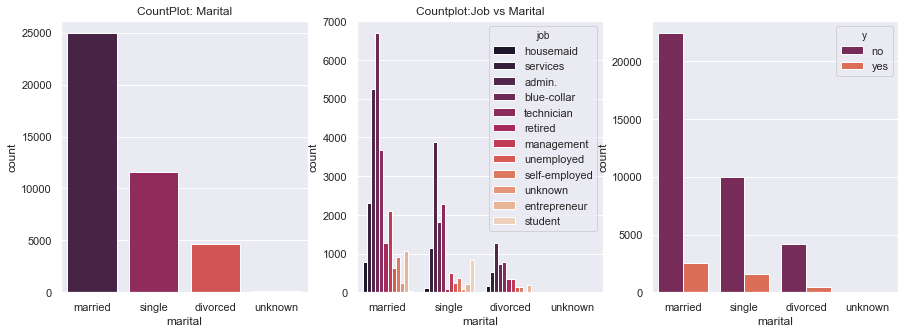

In [25]:
fig,axs = plt.subplots(1,3,figsize=(15,5))
sns.countplot(data["marital"],palette="rocket",ax=axs[0]).set_title("CountPlot: Marital")
sns.countplot(data["marital"],hue="job",data=data,palette="rocket",ax=axs[1]).set_title("Countplot:Job vs Marital")
sns.countplot(data["marital"],hue="y",palette= "rocket",data=data,ax=axs[2])
plt.subplots_adjust(hspace =0.7)

In [26]:
data.groupby(["marital"]).y.value_counts().unstack()

y,no,yes
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


In [27]:
#For futher analysis you can check these charts
"""chart=sns.catplot(x="job", y="age",col="marital",hue="y",data=data,palette="rocket",height=8,kind="bar", aspect=1)
chart.set_xticklabels(rotation=45) 
sns.catplot(x="job",y="age",hue="marital",col="y",data=data,palette="rocket") """
#double click to enlarge

'chart=sns.catplot(x="job", y="age",col="marital",hue="y",data=data,palette="rocket",height=8,kind="bar", aspect=1)\nchart.set_xticklabels(rotation=45) \nsns.catplot(x="job",y="age",hue="marital",col="y",data=data,palette="rocket") '

#### From the above graphs and data, we can conclude that most of thec calls were made to married people with a subscription rate of 10.15% and eventhough the calls made to single people were half of that to married people, the subscription rate was 14%.

In [28]:
data["education"].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

[Text(0, 0, 'basic.4y'),
 Text(0, 0, 'high.school'),
 Text(0, 0, 'basic.6y'),
 Text(0, 0, 'basic.9y'),
 Text(0, 0, 'professional.course'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'university.degree'),
 Text(0, 0, 'illiterate')]

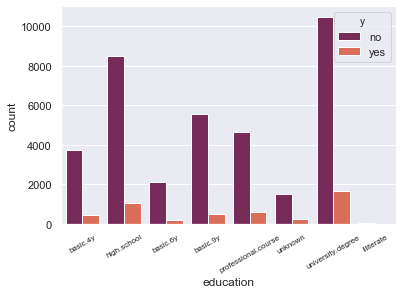

In [29]:
chart=sns.countplot(x=data["education"],hue="y",data=data,palette="rocket")
chart.set_xticklabels(chart.get_xticklabels(),rotation=30,fontsize=8)

<Figure size 2880x216 with 0 Axes>

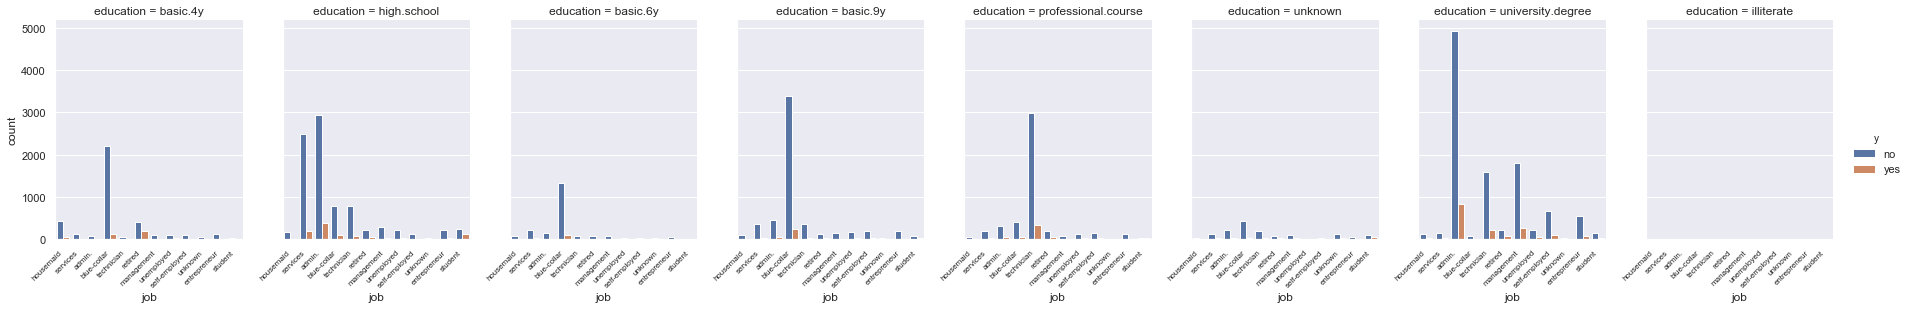

In [30]:
plt.figure(figsize=(40,3))
chart_ed = sns.catplot(x="job", hue="y", col="education",data=data, kind="count",height=4, aspect=.8)
chart_ed.set_xticklabels(rotation=45, horizontalalignment='right',fontsize=8)

In [31]:
#data=raw_data.copy()
data.groupby(["education"]).y.value_counts().unstack()

y,no,yes
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


#### From the above stats and graphs we can see that most of the calls were made to people with basi.9y,highschool degree and university degree and most of the subscribers were also from the same people

In [32]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

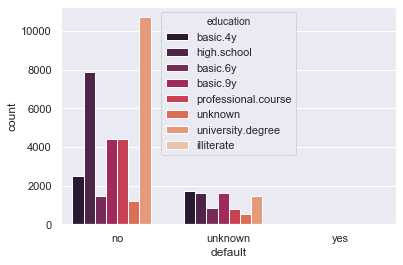

In [33]:
sns.countplot(data["default"],hue="education",data=data,palette="rocket")

In [34]:
data.groupby(["default","job"]).y.value_counts().unstack()

y                          no     yes
default job                          
no      admin.         7846.0  1283.0
        blue-collar    5602.0   486.0
        entrepreneur   1049.0   106.0
        housemaid       647.0    94.0
        management     2158.0   308.0
        retired         933.0   394.0
        self-employed  1004.0   135.0
        services       2774.0   279.0
        student         504.0   267.0
        technician     5080.0   685.0
        unemployed      646.0   130.0
        unknown         148.0    30.0
unknown admin.         1224.0    69.0
        blue-collar    3014.0   152.0
        entrepreneur    283.0    18.0
        housemaid       307.0    12.0
        management      438.0    20.0
        retired         353.0    40.0
        self-employed   268.0    14.0
        services        872.0    44.0
        student          96.0     8.0
        technician      931.0    45.0
        unemployed      223.0    14.0
        unknown         145.0     7.0
yes     technician        2.0     NaN
        unemployed        1.0     NaN

In [35]:
data["default"].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

##### From the above stats we can see that most of the people have no defaults,20% of them have unknown default and only 3 of them do have dafaults who's occupation is technician and unemployed.

In [36]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [37]:
data["contact"].unique()

array(['telephone', 'cellular'], dtype=object)

In [38]:
sub_con=data.groupby(["contact"]).y.value_counts(sort=False).unstack()

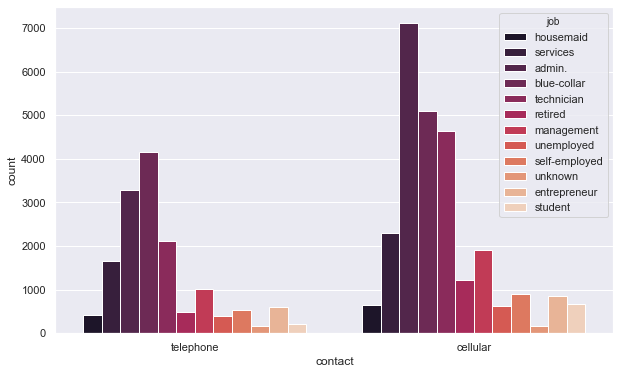

In [39]:
plt.figure(figsize=(10,6))
g=sns.countplot(data["contact"],hue="job",data=data,palette="rocket")

In [40]:
sub_con["Sub_rate"]=sub_con["yes"]/(sub_con["no"]+ sub_con["yes"]) *100
sub_con

y,no,yes,Sub_rate
contact,,,
cellular,22291,3853,14.737607
telephone,14257,787,5.231321


### From the above data we can conclude that mose tof the people had cellphones, with housemaids topping the list and the sunscription rate of people with cellular phones were more than the ones who telephone.

In [41]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

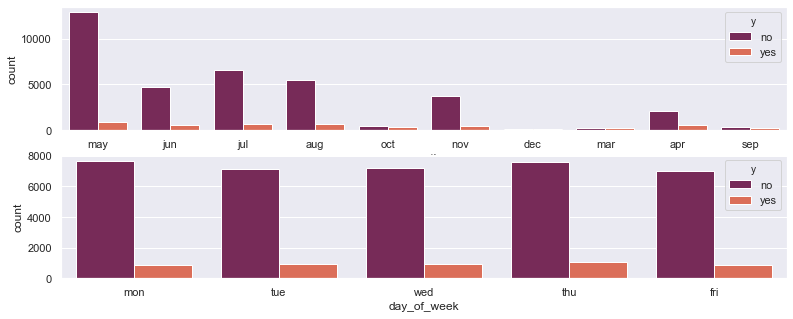

In [42]:
fig,axs = plt.subplots(2,1,figsize=(13,5))
sns.countplot(data["month"],hue="y",data=data,palette="rocket",ax=axs[0])
sns.countplot(data["day_of_week"],hue="y",data=data,palette="rocket",ax=axs[1])

In [43]:
df_day=pd.DataFrame(data.groupby(["month","day_of_week"]).y.value_counts().unstack())

In [44]:
df_day=df_day.add_suffix('_count').reset_index()

In [45]:
df_day.columns

Index(['month', 'day_of_week', 'no_count', 'yes_count'], dtype='object', name='y')

In [46]:
df_day["sub_rate"]=df_day["yes_count"]/(df_day["yes_count"]+ df_day["no_count"]) *100

In [47]:
df_day

y,month,day_of_week,no_count,yes_count,sub_rate
0,apr,fri,548,62,10.163934
1,apr,mon,625,77,10.968661
2,apr,thu,538,230,29.947917
3,apr,tue,171,81,32.142857
4,apr,wed,211,89,29.666667
5,aug,fri,948,122,11.401869
6,aug,mon,1115,107,8.756137
7,aug,thu,1216,131,9.725316
8,aug,tue,1148,148,11.419753
9,aug,wed,1096,147,11.826227


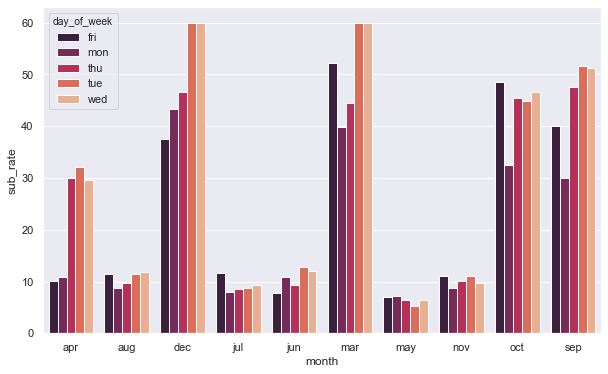

In [48]:
plt.figure(figsize=(10,6))
sns.barplot(x="month",y="sub_rate",hue="day_of_week",palette="rocket",data=df_day)

#### from the above data and stats we can conclude that most of the calls were made in May,and the highest subscription rate were usually on Tuesdays and Wednesdays with lowest on Fridays

In [49]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

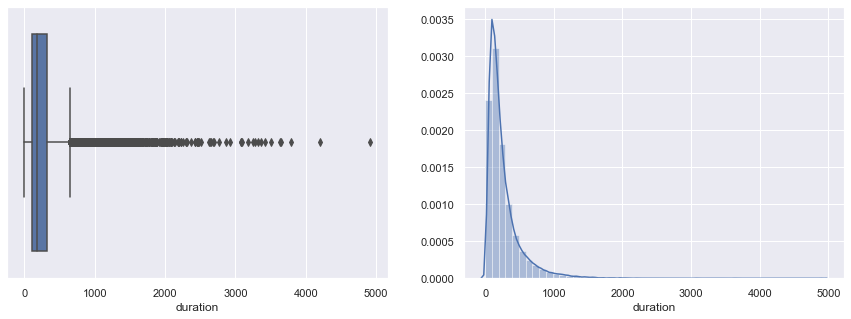

In [50]:
#Duration
fig,axs= plt.subplots(1,2,figsize=(15,5))
sns.distplot(data["duration"],ax=axs[1])
sns.boxplot(data["duration"],orient="h",ax=axs[0])

In [51]:
data["duration"].describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

#### From the above graph and stats, we can see that the 75%of the data falls under 319 and the max is at 4918, hence we can try and eliminate the outliers using IQR method later if we want to build a model.

In [52]:
##Calculate the outlier percentage
q1,q3=data["duration"].quantile(.25),data["duration"].quantile(.75)
IQR=q3-q1
u_iqr = q3+1.5*IQR
outl=data[data['duration'] > u_iqr]["duration"].count()
out_per=outl/len(data["duration"]) *100
print(out_per)

7.193842866854423


[Text(0, 0, 'basic.4y'),
 Text(0, 0, 'high.school'),
 Text(0, 0, 'basic.6y'),
 Text(0, 0, 'basic.9y'),
 Text(0, 0, 'professional.course'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'university.degree'),
 Text(0, 0, 'illiterate')]

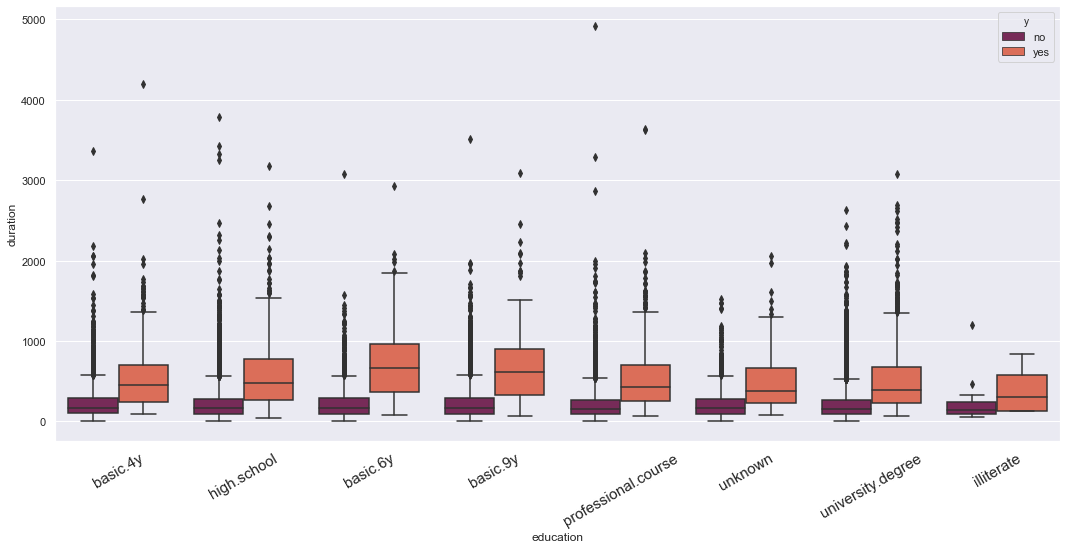

In [53]:
plt.figure(figsize=(18,8))
g=sns.boxplot(x=data["education"],y=data["duration"],hue=data["y"],palette="rocket",data=data)
g.set_xticklabels(g.get_xticklabels(),rotation=30,fontsize=15)

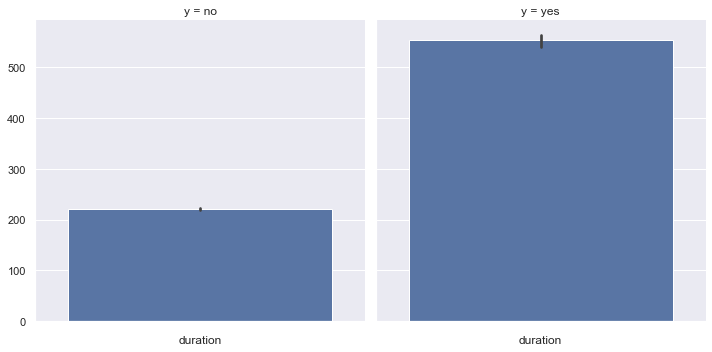

In [54]:
sns.catplot("duration", col="y",data=data,kind="bar",orient="v") 

In [55]:
df=data[["duration","y"]]

In [56]:
df1=df.groupby(["y"],as_index=False).mean()
#df.groupby(['Metadata_A','treatment'],as_index=False).agg({'Metadata_B':'mean','ratio':'first'})

In [57]:
df1

,y,duration
0,no,220.844807
1,yes,553.191164


In [58]:
df1=data.groupby(["y","job"],as_index=False).mean()

In [59]:
df1

,y,job,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,no,admin.,38.219846,215.093385,2.707718,981.270783,0.141125,0.224068,93.566030,-40.349768,3.786567,5175.512051
1,no,blue-collar,39.582057,229.878018,2.588208,991.516365,0.111653,0.303552,93.668887,-41.346565,3.835402,5178.296031
2,no,entrepreneur,41.703453,225.632883,2.579580,987.813814,0.128378,0.242868,93.626245,-41.319820,3.881632,5180.205631
3,no,housemaid,44.705451,218.778826,2.722222,986.491614,0.089099,0.641300,93.712759,-39.626834,4.243082,5190.553249
4,no,management,42.309707,220.828197,2.532357,984.848613,0.140986,0.141217,93.550062,-40.619992,3.785477,5175.037442
5,no,retired,59.926128,224.263608,2.657076,960.369362,0.212286,-0.283904,93.493273,-38.920762,3.249794,5146.043313
6,no,self-employed,40.176887,222.220912,2.724843,988.073113,0.123428,0.242610,93.591786,-40.501022,3.854206,5177.958019
7,no,services,38.090236,225.047998,2.619309,991.091607,0.136314,0.256720,93.650433,-41.327537,3.793805,5176.038069
8,no,student,26.396667,228.851667,2.238333,924.596667,0.395000,-1.133167,93.350790,-40.751500,2.208683,5104.507500
9,no,technician,38.600033,213.452021,2.641776,985.135540,0.111093,0.441693,93.584196,-39.918310,4.012318,5184.951705


[Text(0, 0, 'admin.'),
 Text(0, 0, 'blue-collar'),
 Text(0, 0, 'entrepreneur'),
 Text(0, 0, 'housemaid'),
 Text(0, 0, 'management'),
 Text(0, 0, 'retired'),
 Text(0, 0, 'self-employed'),
 Text(0, 0, 'services'),
 Text(0, 0, 'student'),
 Text(0, 0, 'technician'),
 Text(0, 0, 'unemployed'),
 Text(0, 0, 'unknown')]

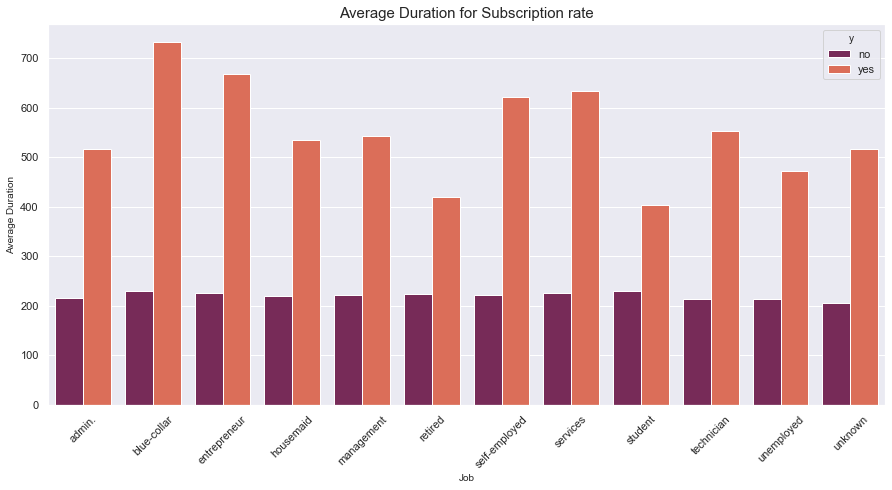

In [60]:
plt.figure(figsize=(15,7))
ax=sns.barplot(x="job",y="duration",hue="y",data=df1,palette="rocket")
ax.set_xlabel("Job",fontsize=10)
ax.set_ylabel("Average Duration",fontsize=10)
ax.set_title("Average Duration for Subscription rate",fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

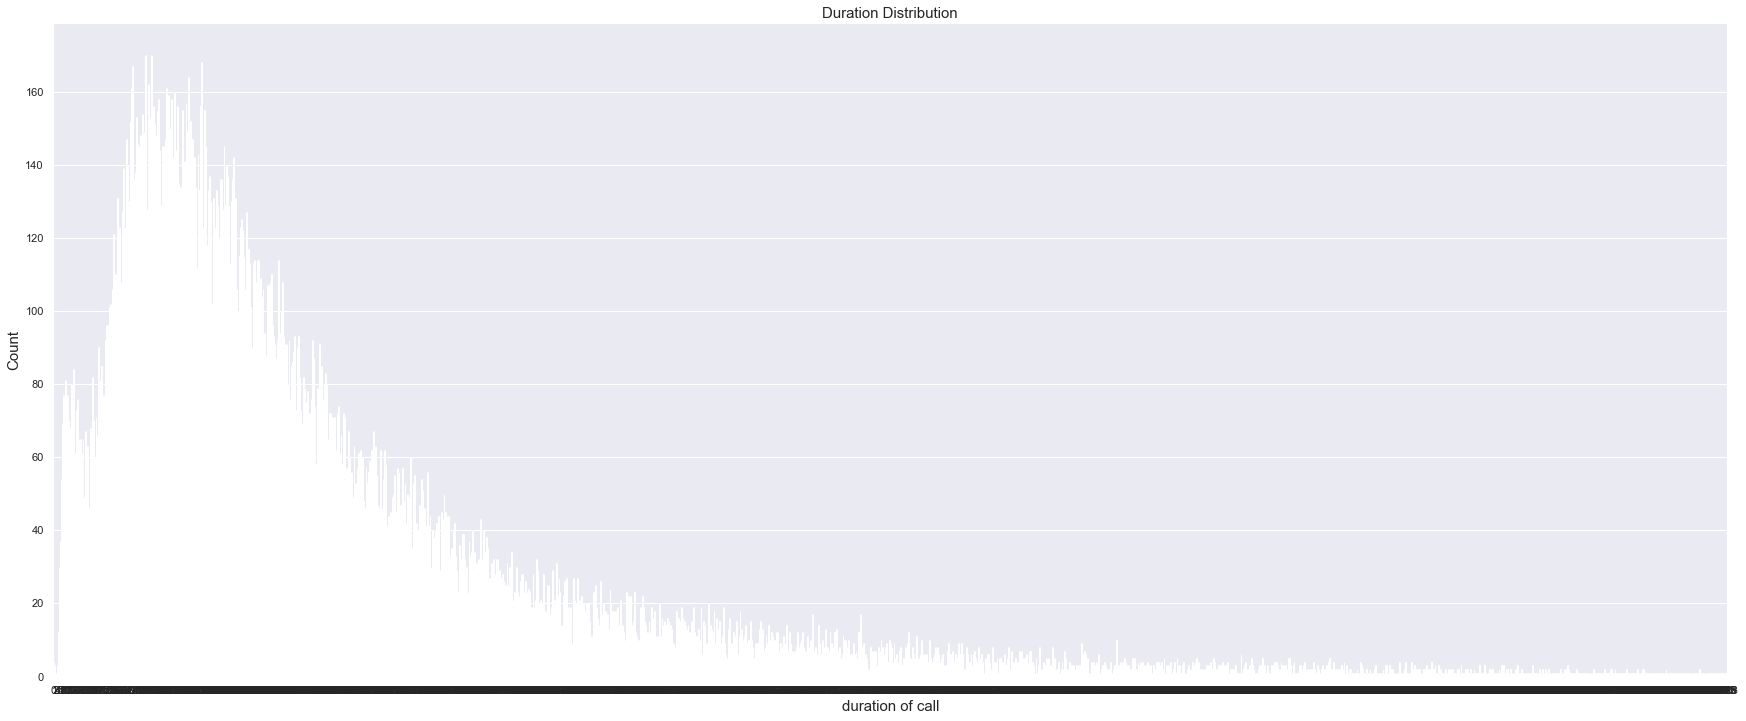

In [61]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 12)
sns.countplot(x = 'duration',  palette="rocket", data = data)
ax.set_xlabel('duration of call', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Duration Distribution', fontsize=15)
sns.despine()

* From the above graphs and data we can see that duration plays a major factor in the subscription rate of a call, longer the duration , more are thec chances of a call converting intoa a subscription we can also see that, the duration of the call of the people who did not subscribe 